# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
df=pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

# copying data to another variable to avoid any changes to original data
data = df.copy()

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data.

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observations:**

1. **order_id**: A unique identifier for each order, used to distinguish between different orders in the dataset.
   
2. **customer_id**: A unique identifier for each customer, used to track orders placed by different customers.
   
3. **restaurant_name**:The name of the restaurant where the order was placed, useful for analyzing restaurant-specific data.
   
4. **cuisine_type**: The type of cuisine (e.g., Korean, Japanese, Mexican), which helps categorize the food based on cuisine.
   
5. **cost_of_the_order**:  The total monetary cost of the order, used to analyze spending trends and pricing.
   
6. **day_of_the_week**:  Indicates whether the order was placed on a "Weekday" (Monday to Friday) or "Weekend" (Saturday/Sunday), helpful for analyzing order patterns based on days.
   
7. **rating**:  The rating given by the customer (out of 5), used to measure customer satisfaction with the food and service.
   
8. **food_preparation_time**:  The time (in minutes) it takes for the restaurant to prepare the food, useful for analyzing restaurant efficiency.
   
9. **delivery_time**:  The time (in minutes) taken by the delivery person to deliver the food, useful for assessing delivery performance.
   


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Calculating the number of Rows and Columns
rows, columns= data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 1898
Number of columns: 9


#### Observations: The dataset has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* All columns have 1898 non-null values, meaning there are no missing values in the dataset.
*   order_id, customer_id, food_preparation_time, and delivery_time are of integer type, which is correct since these represent numeric values.
*   cost_of_the_order is of float64 type, which makes sense as it is a monetary value that may include decimal places.
*   restaurant_name and cuisine_type are object types (strings), which is correct since these represent textual data.
*   Rating is an object type, but it should likely be a float64 or int64 if it represents numerical ratings possibly because some of the columns have "Not Given".









### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# checking missing values
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values present. There is "Not Given" under Rating. However that wont be considered as null.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Statiscal summary of data
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

**Minimum food preparation time: 20.0 minutes**

**Average food preparation time: 27.37197 minutes**

**Maximum food preparation time: 35.0 minutes**

The above table displays the descriptive analysis for Numerical columns.

1. **Order ID**: 1898 orders, mean around 1,477,495, with a small range from 1,476,547 to 1,478,444.
2. **Customer ID**: 1898 unique orders, mean around 171,168, with a wide range (1,311 to 405,334).
3. **Restaurant Name**: It can be observed that there are 178 unique restaurants, **Shake Shack** is the most popular (219 occurrences).
4. **Cuisine Type**: 14 unique cuisines, **American** is the most common (584 orders).
5. **Cost of the Order**:Nearly 75% of the orders cost around $22.2975 and maximum order cost dollar 35.41.

6. **Day of the Week**: Most orders are on the **Weekend** (1351 out of 1898) indicating that customers are frequently ordering on weekends.
7. **Rating**: 736 orders marked **"Not given"**, indicating that customers have not rated those orders.
8. **Food Preparation Time**: Average time taken for food preparation is 27.37 minutes, with a range of 20 to 35 minutes.
9. **Delivery Time**: Average delivery time is 24.16 minutes, ranging from 15 to 33 minutes.

### **Question 5:** How many orders are not rated?

In [ ]:
# Checking for null values in the 'rating' column (including 'Not given' values)
non_rated_orders = data[pd.isnull(data['rating']) | (data['rating'].astype(str).str.lower() == 'not given')]

# Count the orders that are not rated (i.e., 'Not given' or Null)
not_rated_count = non_rated_orders.shape[0]

# Orders with ratings given (i.e., rated)
rated_orders_count = data.shape[0] - not_rated_count

print("Total number of orders placed:", data.shape[0])
print("Number of orders rated:", rated_orders_count)
print("Number of orders not rated:", not_rated_count)

Total number of orders placed: 1898
Number of orders rated: 1162
Number of orders not rated: 736


#### Observations:
The total number of orders placed are 1898. Out of which customers have not rated 736 orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

**Let us first explore the numerical variables.**

####**1.**   **Cost Of the Order**

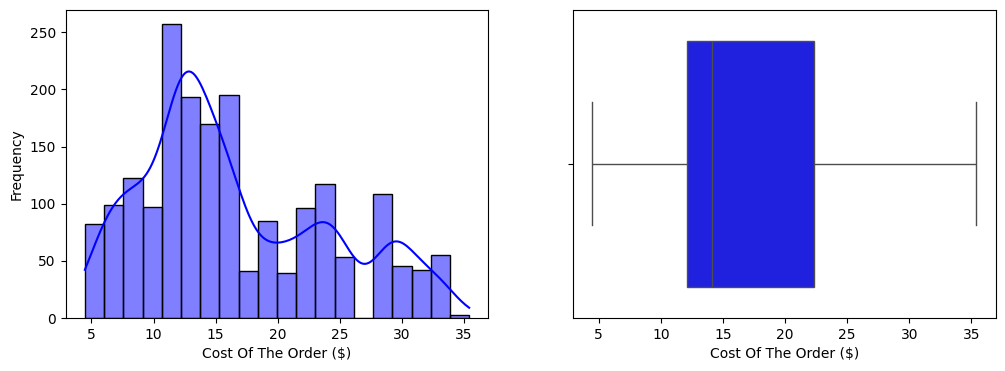

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(data=data,x='cost_of_the_order', bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_xlabel("Cost Of The Order ($)")
axes[0].set_ylabel("Frequency")
sns.boxplot(data=data,x='cost_of_the_order', ax=axes[1],color="blue")
axes[1].set_xlabel("Cost Of The Order ($)")
plt.show()

**Observations:**


1.   **Right Skewed**:The distribution of order costs is right-skewed, meaning most orders are on the lower end of the cost spectrum but some high-value orders exist.
2.   **Interquartile range (IQR)**:The interquartile range (IQR) is relatively wide, indicating a significant spread in order costs.

3.   There is a peak around $10, indicating that a large number of orders are clustered at this price point.

4.   Most orders are relatively affordable (under $15), but there are higher-cost cost orders as well.

5.   Restaurants could offer tiered pricing to appeal to different customer segments (budget-friendly vs. premium).


6.   The presence of outliers might indicate premium restaurant orders or bulk purchases.There are outliers on the higher end, suggesting some expensive orders that are significantly above the typical range.


####**2.**   **Food Preparation Time**

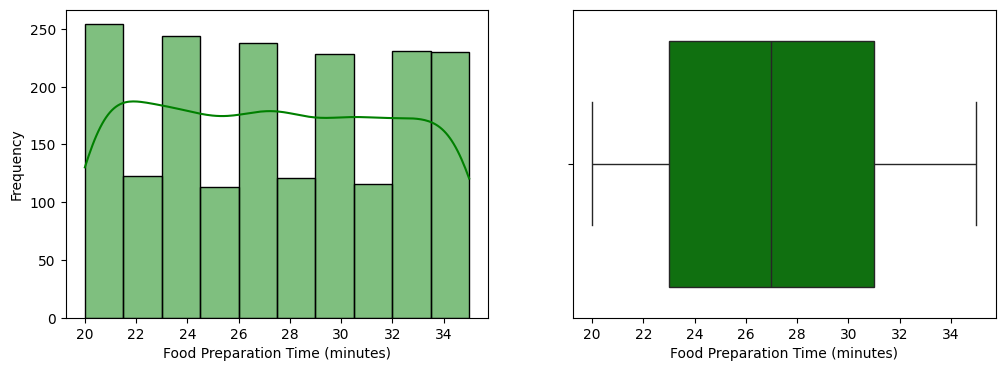

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=data,x='food_preparation_time',bins=10, kde=True, color="green", ax=axes[0])
axes[0].set_xlabel("Food Preparation Time (minutes)")
axes[0].set_ylabel("Frequency")
sns.boxplot(data=data,x='food_preparation_time', color="green",ax=axes[1])
axes[1].set_xlabel("Food Preparation Time (minutes)")
plt.show()

**Observations:**


1.   The food preparation time ranges between 20 minutes to 35 minutes.
2.   The data follows a roughly normal distribution, meaning consistent kitchen efficiency.

3.   There is a peak at certain intervals suggesting that specific preparation times like 30 to 35 minutes are more common.

4.   The median is near the IQR indicating symmetrical distribution.

5.   We can observe that food preparation times are relatively consistent with no extreme delays.





####**3.**   **Ratings**

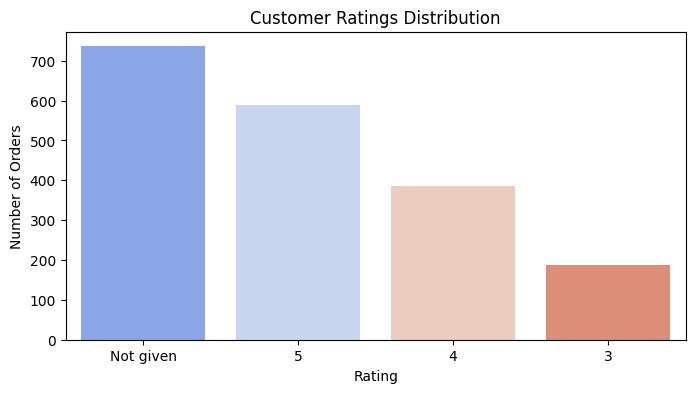

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['rating'].value_counts().index,
            y=df['rating'].value_counts().values, palette="coolwarm", hue=df['rating'].value_counts().index, legend=False)
plt.title("Customer Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Orders")
plt.show()

**Observations:**


1.   Significant number of ratings have "Not Given" which means customers have not rated those orders.
2.   Most ratings are 5-star or 4-star , showing high customer satisfaction.

3.   The lack of 1 and 2 ratings suggests generally favorable reviews.

4.   As most of the ratings are around 5 indicates that customer satisfaction is fairly strong.

5. Offering a small discount or reward points for leaving reviews can improve feedback collection.






####**4.**   **Delivery Time**

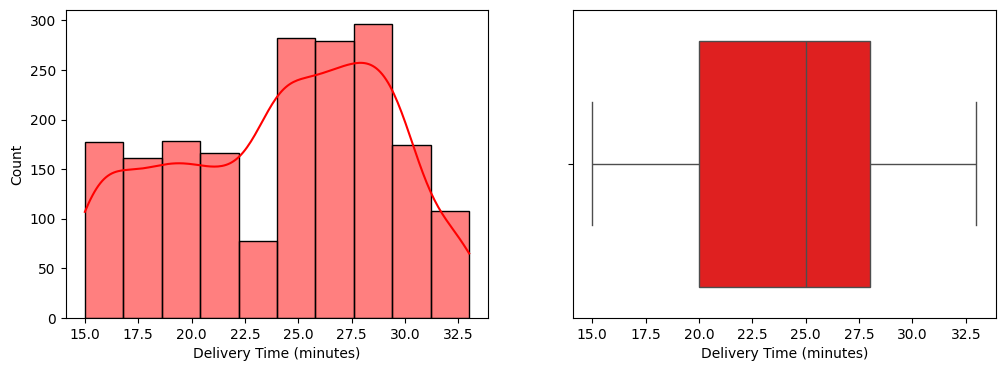

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=data,x='delivery_time',ax=axes[0], bins=10,kde=True, color="red")
axes[0].set_xlabel("Delivery Time (minutes)")
sns.boxplot(data=data,x='delivery_time', ax=axes[1], color="red")
axes[1].set_xlabel("Delivery Time (minutes)")
plt.show()


**Observations:**


1.   The distribution is slightly right-skewed with more deliveries taking around 25-30 minutes.
2.   Smaller number of deliveries occur below 20 minutes or above 30 mintues.

3.   The IQR also spans around 20 to 30 minutes meaning most deliveries fall within this window.

4.  Minimal extreme delays, indicating generally efficient delivery operations.
5.  If certain locations consistently take longer, consider localized hubs for faster delivery.







####**Let's now explore the Categorical columns.**

####**5.**   **Order Id**

In [ ]:
#Find the number of unique orders
print("Total number of orders:",len(df['order_id'].unique()))


Total number of orders: 1898


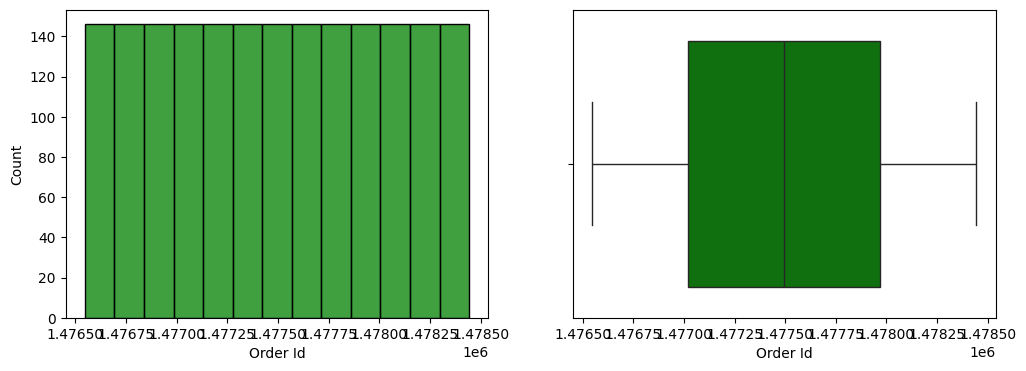

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=data,x='order_id',ax=axes[0] , color="green")
axes[0].set_xlabel("Order Id")
sns.boxplot(data=data, x='order_id',ax=axes[1], color="green")
axes[1].set_xlabel("Order Id")
# Show the combined plot
plt.show()



**Observations:**

1. **Order ID as a Unique Identifier**: It is a unique numeric identifier for each order.
2. **Sequential Nature**: The **Order ID** values are almost sequential, indicating a likely progression of orders.
3. **Visualizing Progression**: As we can see that **Order ID** has a smooth, continuous progression indicating that there is no gap and its unique, sequential in nature.


####**6.**   **Customer Id**

In [ ]:
print("Total number of customers:",len(df['customer_id'].unique()))


Total number of customers: 1200


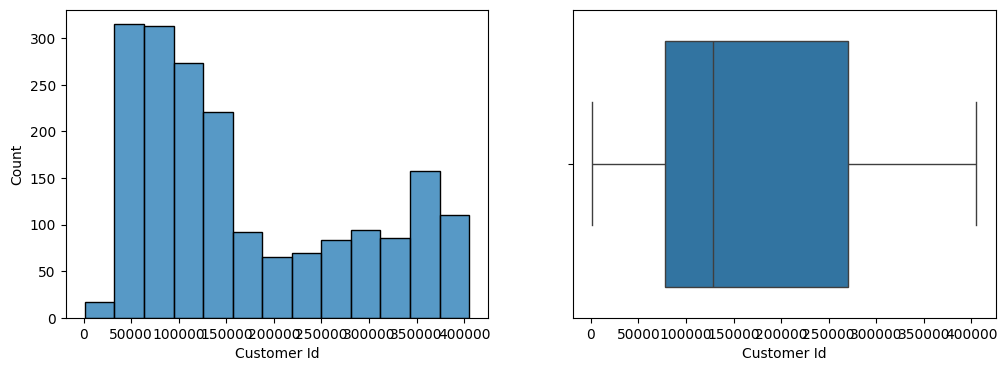

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=data,x='customer_id',ax=axes[0] )
sns.boxplot(data=data, x='customer_id',ax=axes[1])
axes[0].set_xlabel("Customer Id")
axes[1].set_xlabel("Customer Id")
# Show the combined plot
plt.show()

**Observations:**


1.   There are total 1200 unique restaurants.
2. A majority of customers belong to the lower range of customer ID's indicating older or more frequent customers.
3.   The peak near 400,00 suggests a newer group of active customers.







####**7.**   **Restaurant Name**

In [ ]:
print("Total number of restaurants:",len(df['restaurant_name'].unique()))


Total number of restaurants: 178


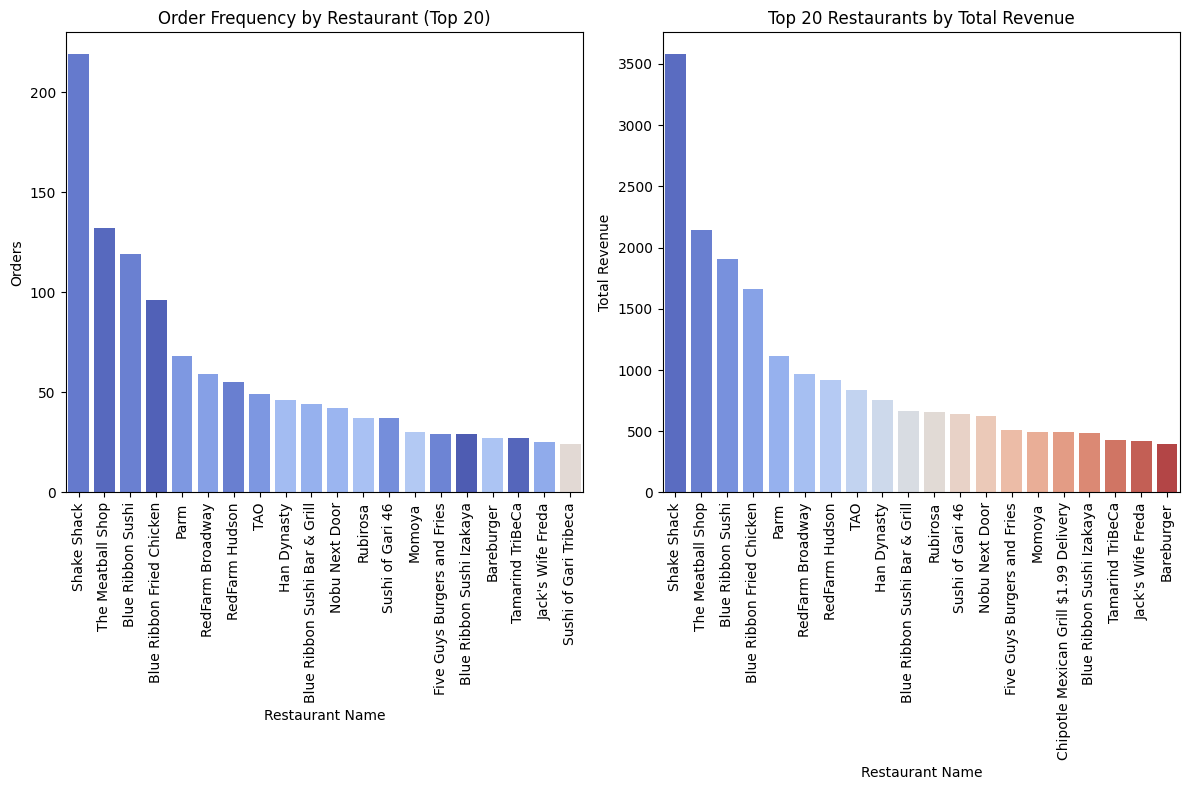

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# 1. Countplot for Restaurant Name (Order Frequency)
sns.countplot(data=data, x='restaurant_name', order=data['restaurant_name'].value_counts().index[:20], ax=axes[0],palette="coolwarm" , hue="restaurant_name", legend=False)
axes[0].set_title("Order Frequency by Restaurant (Top 20)")
axes[0].set_xlabel("Restaurant Name")
axes[0].set_ylabel("Orders")
axes[0].tick_params(axis='x', rotation=90)

# 2. Total Revenue by Restaurant (Bar Chart)
total_revenue = data.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False)
total_revenue_top_20 = total_revenue.head(20)  # Top 20 restaurants based on revenue

# Use barplot instead of countplot to plot total revenue
sns.barplot(x=total_revenue_top_20.index, y=total_revenue_top_20.values, ax=axes[1],palette="coolwarm",hue=total_revenue_top_20.index, legend=False)

axes[1].set_title("Top 20 Restaurants by Total Revenue")
axes[1].set_xlabel("Restaurant Name")
axes[1].set_ylabel("Total Revenue")
axes[1].tick_params(axis='x', rotation=90)

# Show the combined plot
plt.tight_layout()
plt.show()

**Observations:**


1.   There are total 178 restaurants which are serving orders.
2. Shake Shack is the most revenue generating restaurant.
3.  The plot shows the top 10 restaurants has the most revenue and orders placed.

4.   Remaining restaurants within top 20 have fairly similar distribution in terms of both order and revenue.





####**8.**   **Cuisine Type**

In [ ]:
print("Total number of cuisines available:",len(df['cuisine_type'].unique()))

Total number of cuisines available: 14


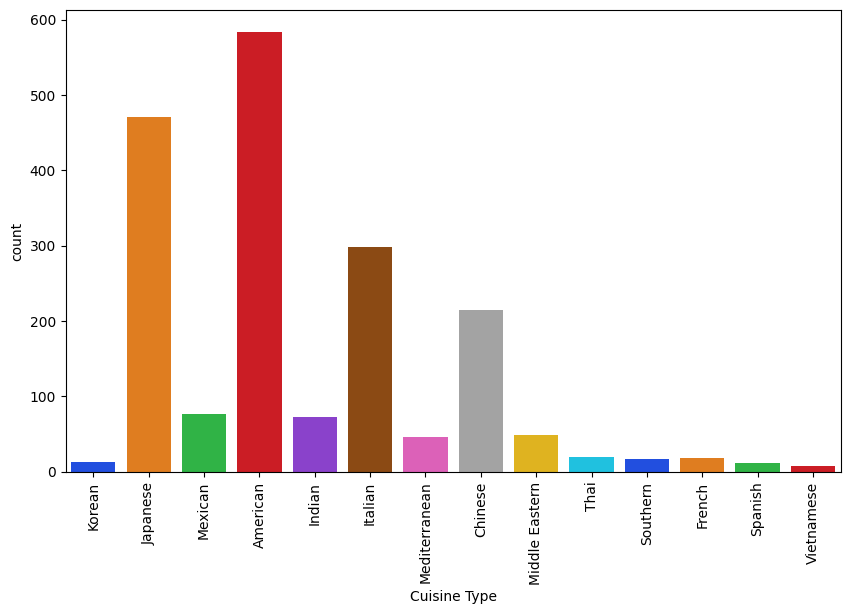

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='cuisine_type', palette="bright", hue="cuisine_type", legend= False)
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90);

**Observations:**


1.   There are total of 14 different types of cuisines available.
2. American cuisine has the maximum number of orders which suggests this is customer preference.
3.  Japenese, Italian and Chinese is also very favored by the customers.

4.   Vietnamese cuisine has the least number of orders.





####**9.**   **Day Of the Week**

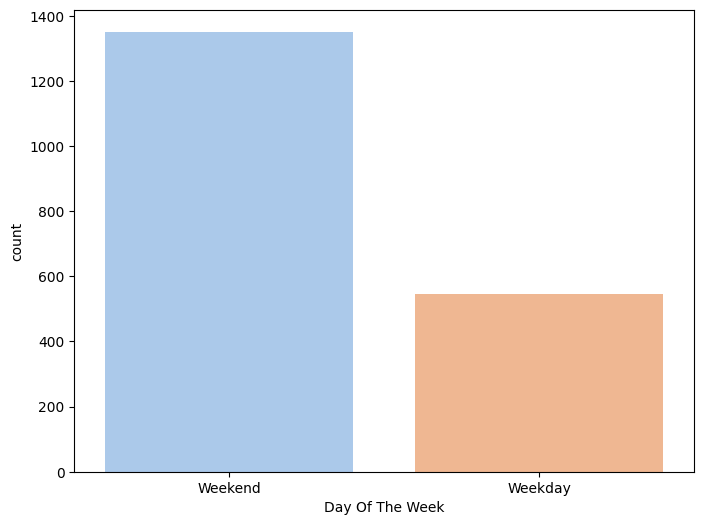

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='day_of_the_week', palette="pastel", hue= "day_of_the_week", legend=False);
plt.xlabel('Day Of The Week');

**Observations:**


1. Nearly 71% of the orders are placed on weekends suggesting that most customers place orders on Saturdays and Sundays.
2. Weekday orders are significantly lower, likely due to people cooking at home or having work-related constraints.

3. Restaurants should consider staffing up and preparing for higher order volumes during weekends.






### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

The top 5 restuarants in terms of the number of orders received are: 


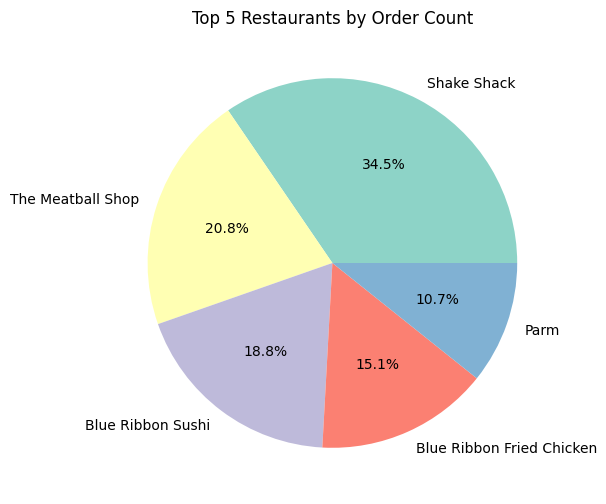

In [ ]:
# Counting the Top 5 restaurants
count_restaurant_orders = data['restaurant_name'].value_counts().head(5)
print("The top 5 restuarants in terms of the number of orders received are: ")

#Displaying top 5 restaurants as a pie diagram
plt.figure(figsize=(8, 6))
count_restaurant_orders.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set3", n_colors=5))
plt.title('Top 5 Restaurants by Order Count')
plt.ylabel('')
plt.show()

#### Observations:

1. Shake shake being the top restuarant with maximum number of orders indicating that american cuisine is the most popular, with a significant lead over other cuisines.
2. Blue ribbon Sushi(Japanese) and Parm(Italian) also have strong demand, indicating customer preference for these food types.


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Selecting the most popular cuisine on weekends
popular_cuisine_weekend = data[data['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
print("The most popular cuisine on weekends is:", popular_cuisine_weekend)

The most popular cuisine on weekends is: American


#### Observations: The maximum number of orders placed on Weekends are of American cuisine suggesting american cuisine being the customers favorite.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Calculating the percentage of the orders cost more than 20 dollars
orders_more_than_20 = data[data['cost_of_the_order'] > 20]
percentage_orders_more_than_20 = (orders_more_than_20.shape[0] / data.shape[0]) * 100
print("Percentage of orders costing more than $20:", percentage_orders_more_than_20)

Percentage of orders costing more than $20: 29.24130663856691


#### Observations:
1. Since over 70% of the orders cost less than 20 dollars most customers likely prefer budget-friendly meals.
2. The 29.24% of orders exceeding 20 dollars could represent higher-end restaurants, large group orders, or premium food choices (e.g., steak, seafood, sushi).
3. Since most orders are under $20, offering combo deals, discounts on larger orders, or premium add-ons could encourage customers to spend more.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Calculating the mean delivery time
mean_delivery_time = data['delivery_time'].mean()
print("The mean order delivery time is:", round(mean_delivery_time, 2), "minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:
1. A 24-minute average suggests a fairly quick turnaround time, indicating that restaurants and delivery partners are efficiently fulfilling orders.
2. Analyzing the distribution like standard deviation or outliers would help identify whether delays are common.
3. Certain cuisines like fast food or pre-prepared meals might contribute to shorter delivery times.
4. Made-to-order or complex dishes like sushi, gourmet meals might take longer to prepare and deliver.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
top_3_customers = data['customer_id'].value_counts().head(3)
print("The top 3 customers are:")
top_3_customers

The top 3 customers are:


,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
1. The top 3 customers are highly engaged users, meaning they regularly order from the platform with maximum number of order placed by the top customer is 13.
2. Encourage these top customers to refer friends by giving referral discounts, leveraging their loyalty for growth.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


#### 1. Exploring Relationships Between Numerical Variables

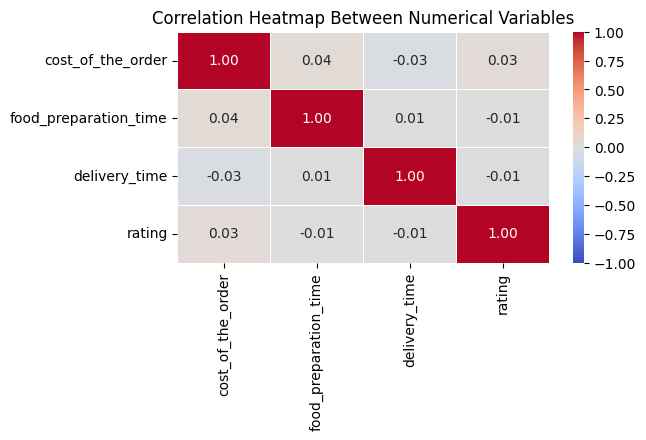

In [ ]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Calculate the correlation matrix for numerical columns including 'rating'
correlation_matrix = data[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")

# Title and labels
plt.title('Correlation Heatmap Between Numerical Variables')
plt.show()


#####Observations:
*   There is little to no correlation between **cost_of_the_order, food_preparation_time, and delivery_time**, meaning they do not strongly influence each other.
*   The correlation coefficient is 0.01 between food preparation time and delivery time, indicating almost no relationship them.
*   Lower ratings might be linked to longer delivery times, suggesting delays negatively impact customer satisfaction.
*   Higher-cost orders might come from premium restaurants that prioritize fast delivery to maintain customer satisfaction.





#####Cost of the Order vs. Food Preparation Time

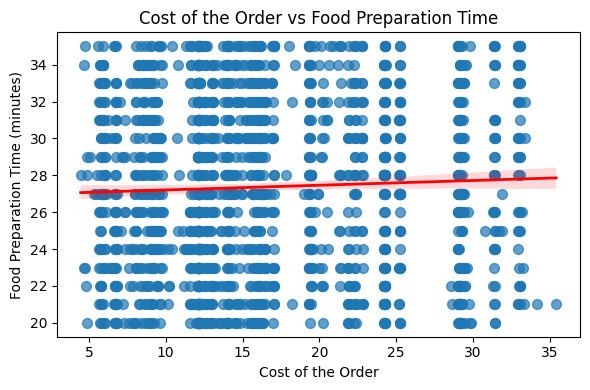

In [ ]:
# Create a scatter plot with a regression line between 'cost_of_the_order' and 'food_preparation_time'
plt.figure(figsize=(6, 4))
sns.regplot(x='cost_of_the_order', y='food_preparation_time', data=data, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red', 'linewidth': 2})

# Customize the plot
plt.title('Cost of the Order vs Food Preparation Time')
plt.xlabel('Cost of the Order')
plt.ylabel('Food Preparation Time (minutes)')
plt.tight_layout()
plt.show()



######**Observation**:
1. **No Strong Correlation –** There is no clear upward or downward trend, indicating that higher-cost orders do not necessarily take longer to prepare.
2. **Most Orders Cluster Around Lower Costs** – The majority of orders are below $30, with food prep times ranging mostly between 15-30 minutes.
3. **Some High-Cost Orders with Low Prep Times** – A few expensive orders were prepared quickly, possibly indicating premium fast-service items or pre-prepared meals.


#####Cost of the Order vs. Delivery Time

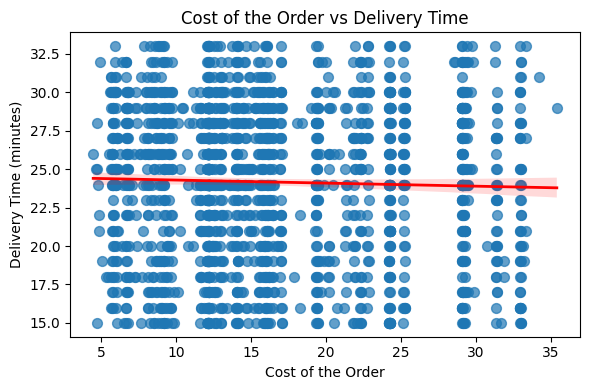

In [ ]:
# Create a scatter plot with a regression line between 'cost_of_the_order' and 'delivery_time'
plt.figure(figsize=(6, 4))
sns.regplot(x='cost_of_the_order', y='delivery_time', data=data, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red', 'linewidth': 2})

# Customize the plot
plt.title('Cost of the Order vs Delivery Time')
plt.xlabel('Cost of the Order')
plt.ylabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()



######**Observation**:
1.  **No Strong Correlation** – There isn't a clear trend showing that higher-cost orders take longer or shorter to deliver.
2.  **Most Orders Cluster Below 30 dollars** – The majority of orders are under $30, with delivery times ranging between 15-30 minutes.
3. **Wide Spread for Higher-Priced Orders** – Some expensive orders have both short and long delivery times, indicating that factors other than price like restaurant location, delivery traffic impact delivery speed



#####Rating vs. Cost of the Order

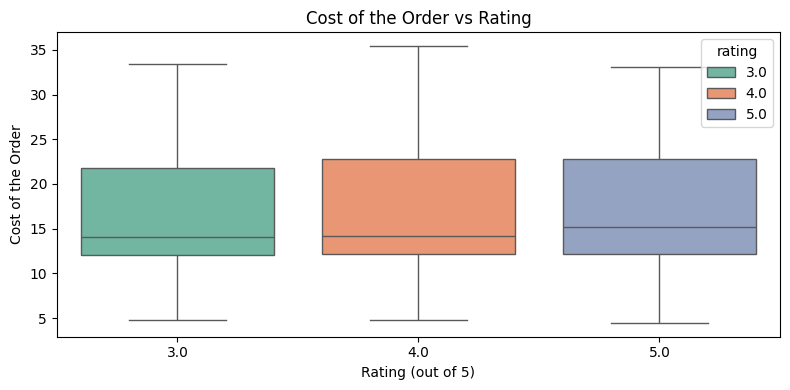

In [ ]:
# Create a boxplot with 'rating' on the x-axis and 'cost_of_the_order' on the y-axis
plt.figure(figsize=(8, 4))
sns.boxplot(x='rating', y='cost_of_the_order', data=data, hue='rating', palette='Set2')

# Customize the plot
plt.title('Cost of the Order vs Rating')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Cost of the Order')
plt.tight_layout()
plt.show()


######**Observation**:
1. **Similar Cost Distributions Across Ratings** – Orders rated 3, 4, and 5 have a fairly similar range of costs, suggesting that order price does not strongly influence customer ratings.
2. **Median Cost is Consistent** – The median cost of the order does not change significantly across different ratings.
3. **Some High-Cost Outliers** – There are a few expensive orders across all ratings, meaning even high-priced orders receive both good and bad ratings.




#####Rating vs. Food Preparation/Delivery time

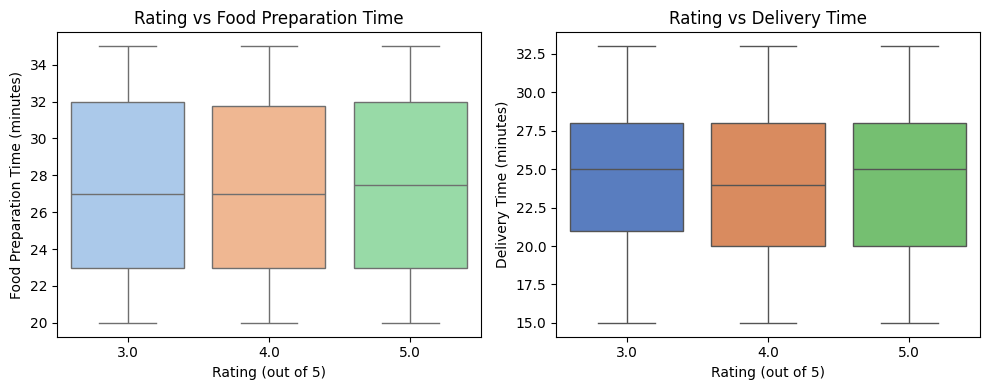

In [ ]:
# Create a figure with two subplots: one for Food Preparation Time and one for Delivery Time
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'Rating vs Food Preparation Time' with 'rating' as hue
sns.boxplot(x='rating', y='food_preparation_time', data=data, hue='rating', palette='pastel', ax=axes[0], legend=False)
axes[0].set_title('Rating vs Food Preparation Time')
axes[0].set_xlabel('Rating (out of 5)')
axes[0].set_ylabel('Food Preparation Time (minutes)')

# Boxplot for 'Rating vs Delivery Time' with 'rating' as hue
sns.boxplot(x='rating', y='delivery_time', data=data, hue='rating', palette='muted', ax=axes[1], legend=False)
axes[1].set_title('Rating vs Delivery Time')
axes[1].set_xlabel('Rating (out of 5)')
axes[1].set_ylabel('Delivery Time (minutes)')

# Adjust layout
plt.tight_layout()
plt.show()


######**Observation**:
1. **Preparation Time is Fairly Consistent Across Ratings** – The median food preparation time is similar for all ratings, meaning it does not strongly impact customer satisfaction.
2. **Some High Prep Time Outliers** – A few orders with longer prep times received lower ratings, but this pattern is not strong.
3. **Longer Delivery Times Might Lead to Lower Ratings** – There is a slight trend where lower-rated orders tend to have longer delivery times.
4. **Faster Deliveries Tend to Receive Higher Ratings** – Orders rated 5 tend to have lower median delivery times, suggesting that quick deliveries contribute to customer satisfaction.






#### 2. Exploring Relationships Between Numerical and Categorical Variables

##### Day of the Week vs. Food Preparation Time / Delivery Time

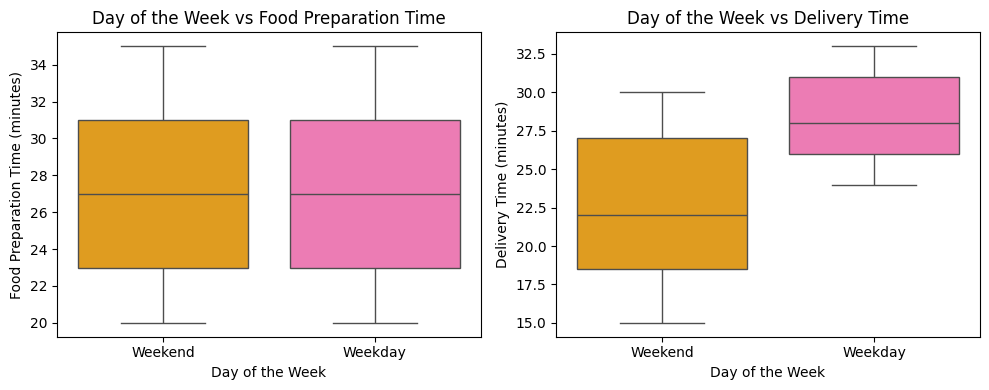

In [ ]:
# Custom color palette with 2 colors (for Weekdays and Weekends)
custom_palette = ['#FFA500', '#FF69B4']  # Orange for weekdays, Pink for weekends

# Create a figure with two subplots: one for Food Preparation Time and one for Delivery Time
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'Day of the Week vs Food Preparation Time'
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=data,hue="day_of_the_week", palette=custom_palette, ax=axes[0])
axes[0].set_title('Day of the Week vs Food Preparation Time')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Food Preparation Time (minutes)')

# Boxplot for 'Day of the Week vs Delivery Time'
sns.boxplot(x='day_of_the_week', y='delivery_time', data=data, hue="day_of_the_week", palette=custom_palette, ax=axes[1])
axes[1].set_title('Day of the Week vs Delivery Time')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Delivery Time (minutes)')

# Adjust layout
plt.tight_layout()
plt.show()


######**Observation**:
1. **Food Prep Time is Fairly Consistent Across Days** – There is no significant variation in food preparation time between weekdays and weekends.
2. **Slightly Longer Prep Times on Weekends** – The median food preparation time appears slightly higher on weekends, possibly due to higher order volumes.
3. **Longer Delivery Times on Weekends** – The median delivery time is higher on weekends, likely due to increased demand and traffic.
4. **More Variability on Weekends** – There are more extreme outliers on weekends, indicating that some deliveries take significantly longer.






##### Day of the Week vs. Rating/Cost Of The order

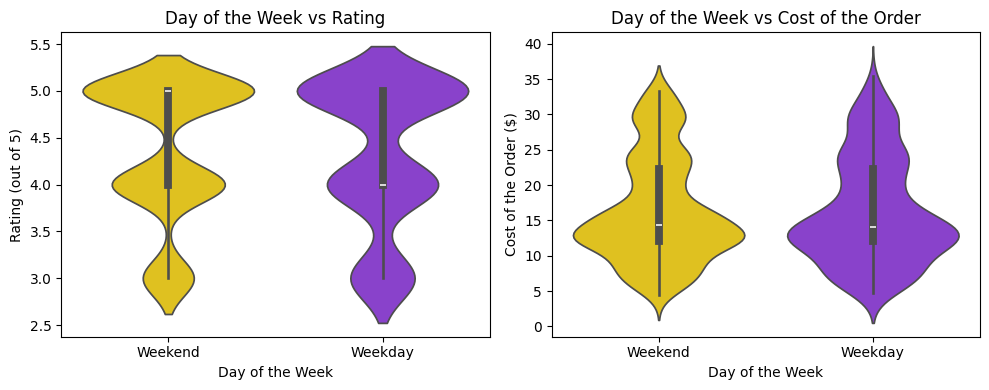

In [ ]:
# Custom color palette
custom_palette = [ '#FFD700', '#8A2BE2']

# Create a figure with two subplots: one for Rating and one for Cost of the Order
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Violin plot for 'Day of the Week vs Rating'
sns.violinplot(x='day_of_the_week', y='rating', data=data,hue= "day_of_the_week", palette=custom_palette, ax=axes[0])
axes[0].set_title('Day of the Week vs Rating')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Rating (out of 5)')

# Violin plot for 'Day of the Week vs Cost of the Order'
sns.violinplot(x='day_of_the_week', y='cost_of_the_order', data=data,hue= "day_of_the_week", palette=custom_palette, ax=axes[1])
axes[1].set_title('Day of the Week vs Cost of the Order')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Cost of the Order ($)')

# Adjust layout
plt.tight_layout()
plt.show()


######**Observation**:


*   **Weekend Orders Have Slightly Higher Ratings**: The difference is small, but weekend orders tend to receive slightly better ratings.
*   Restaurants may prioritize quality and service on busy weekend days.
*   Ratings remain relatively high throughout the week, indicating **consistent service and food quality**.


*   The difference is minimal but weekend orders tend to be slightly more expensive.
*   Customers may order larger meals or premium dishes for leisure dining.
*   More group or family orders on weekends compared to solo or quick meals on weekdays.
*   The cost distribution remains relatively consistent between weekdays and weekends, indicating steady demand.














##### Day of the Week vs. Oders Placed/Cuisine Type

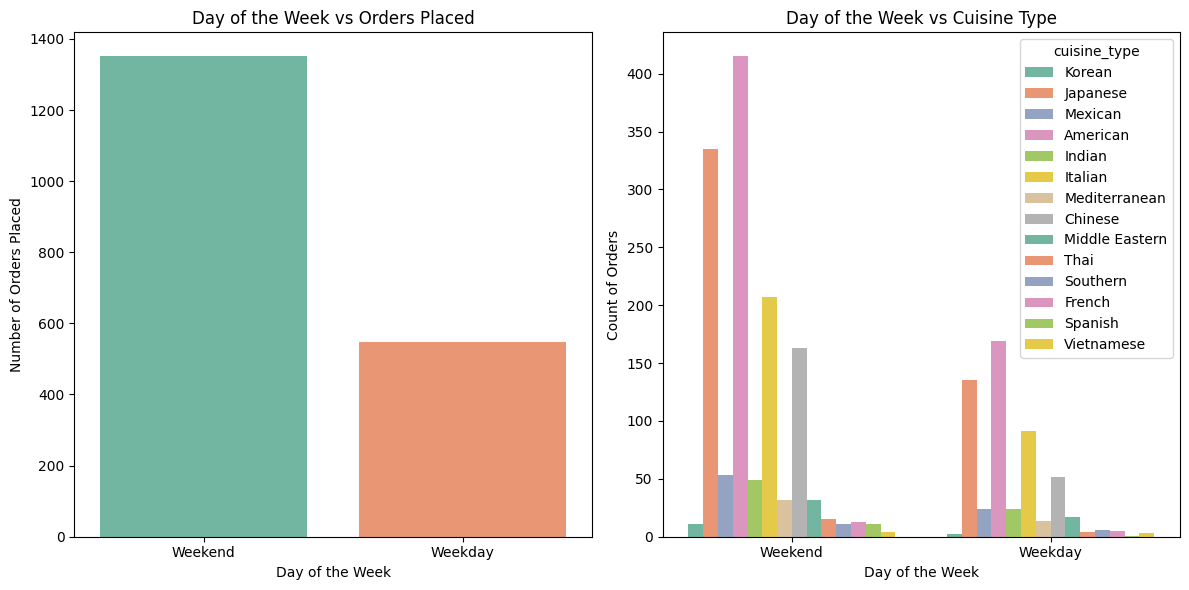

In [ ]:

# Count the number of orders placed per day of the week
order_counts = data['day_of_the_week'].value_counts().reset_index()
order_counts.columns = ['day_of_the_week', 'orders_placed']

# Create a figure with two subplots: one for Orders Placed and one for Cuisine Type
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for 'Day of the Week vs Orders Placed'
sns.barplot(x='day_of_the_week', y='orders_placed', data=order_counts,hue= "day_of_the_week", palette='Set2', ax=axes[0])
axes[0].set_title('Day of the Week vs Orders Placed')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Orders Placed')

# Count plot for 'Day of the Week vs Cuisine Type'
sns.countplot(x='day_of_the_week', hue='cuisine_type', data=data,palette='Set2', ax=axes[1])
axes[1].set_title('Day of the Week vs Cuisine Type')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Count of Orders')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


######**Observation**:


*  The number of orders increases significantly on weekends compared to weekdays.
*   American, Italian, and Japanese cuisines see the largest increase in weekend orders.
*   Chinese, Mexican, and Indian cuisines also experience a boost.
*   Less common cuisines like French, Mediterranean, and Middle Eastern also have increased orders, but at lower volumes.
*   Orders are more evenly distributed among cuisines during weekdays, likely due to lunch breaks, quick meals, and work-related dining.
*   Certain cuisines like Japanese, Italian, and American remain popular on both weekdays and weekends.















##### Cuisine Type vs. Cost of the Order

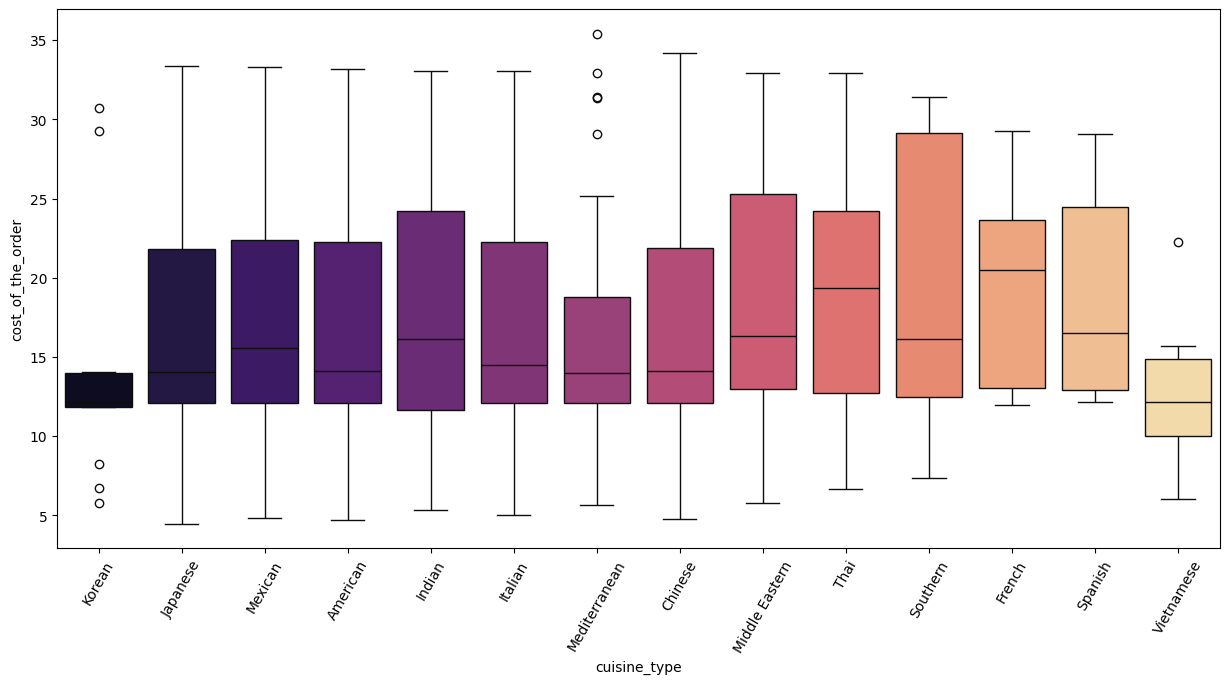

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = data, palette = 'magma', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

######**Observation**:


*  French, Southern, and Thai cuisines have the highest average order costs.
*   Spanish, Middle Eastern,Indian and Mexican cuisines also have higher order costs, likely due to specialty dishes.


*   Korean cuisine has some outliers having the lower price and higher price at the extremes.





















##### Cuisine Type vs. Rating

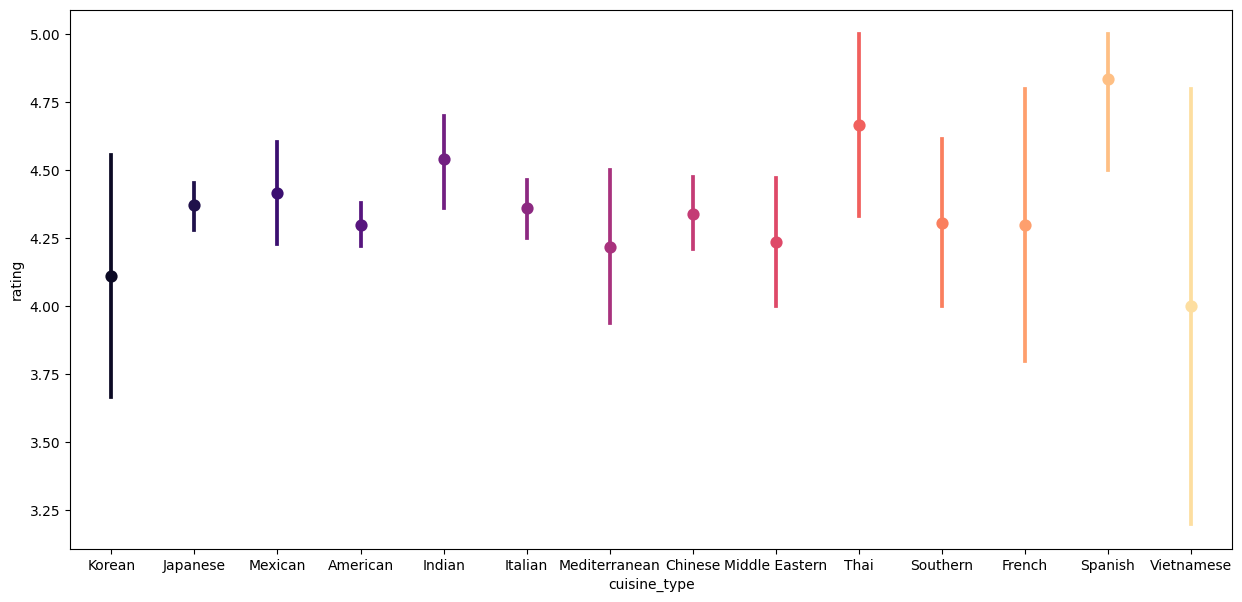

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = "cuisine_type", y = "rating", data = data, palette = 'magma', hue = "cuisine_type")
plt.show()

######**Observation**:

*   Spanish, Thai, and Indian cuisines receive the highest average ratings.
*   Vietnamese and Korean cuisines receive the lowest average ratings
*  Expensive cuisines (French, Southern, Thai) do not always have the highest ratings, meaning price doesn't guarantee satisfaction.
*   Spanish and Thai cuisines are highly rated despite not being the most expensive, indicating strong customer satisfaction.

##### Cuisine Type vs. Food Preparation Time/Delivery Time

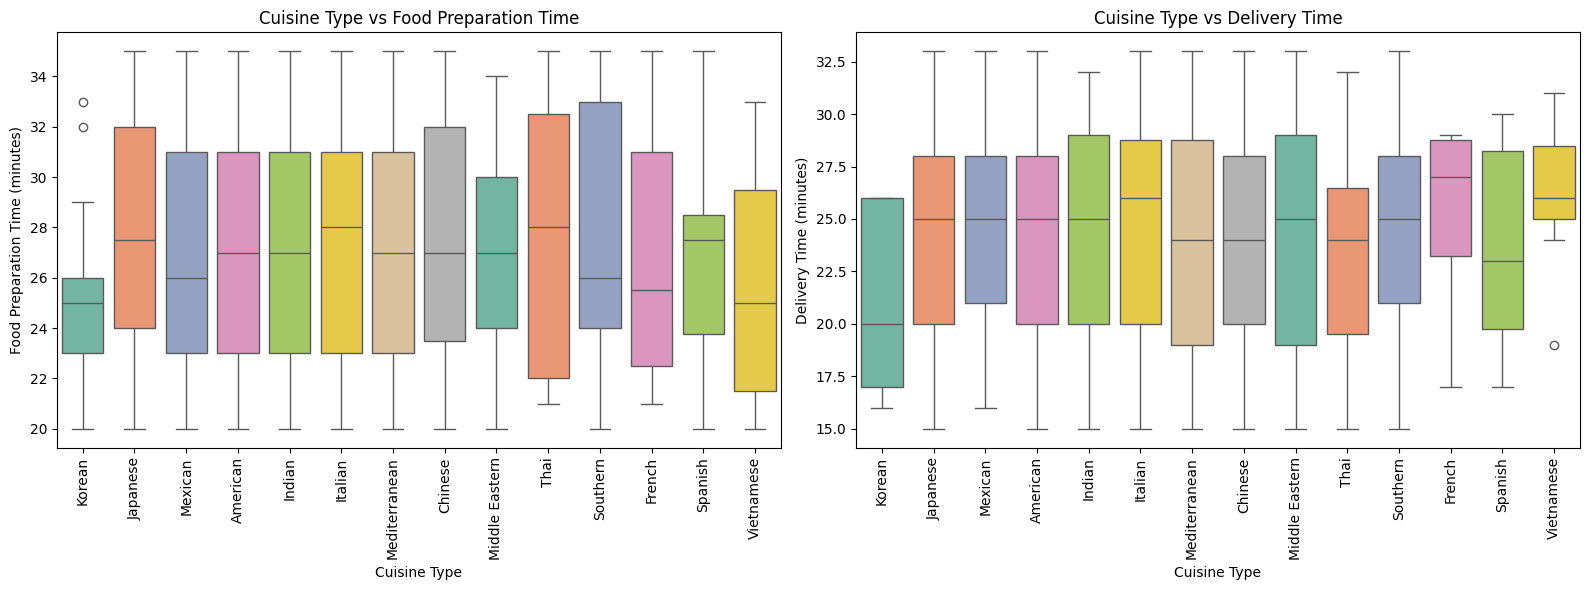

In [ ]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for 'Cuisine Type vs Food Preparation Time'
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=data,hue='cuisine_type', palette='Set2', ax=axes[0],legend=False)
axes[0].set_title('Cuisine Type vs Food Preparation Time')
axes[0].set_xlabel('Cuisine Type')
axes[0].set_ylabel('Food Preparation Time (minutes)')
axes[0].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for readability

# Boxplot for 'Cuisine Type vs Delivery Time'
sns.boxplot(x='cuisine_type', y='delivery_time', data=data,hue='cuisine_type', palette='Set2', ax=axes[1],legend=False)
axes[1].set_title('Cuisine Type vs Delivery Time')
axes[1].set_xlabel('Cuisine Type')
axes[1].set_ylabel('Delivery Time (minutes)')
axes[1].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for readability

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


######**Observation**:


*  French, Middle Eastern, and Southern cuisines have the longest preparation times.
*   Fast-prep cuisines like Mexican, Vietnamese, and American take significantly less time.
*   Thai and Indian cuisines show higher variability, likely due to different dish complexities.
*   French, Middle Eastern, and Indian cuisines tend to have longer delivery times.
*  American, Mexican, and Japanese cuisines are delivered faster, possibly due to efficiency in preparation and logistics.
*   Cuisines with high demand on weekends (e.g., Italian, Indian) may experience delays.

















##### Restaurant Name vs. Cost of the Order / Rating

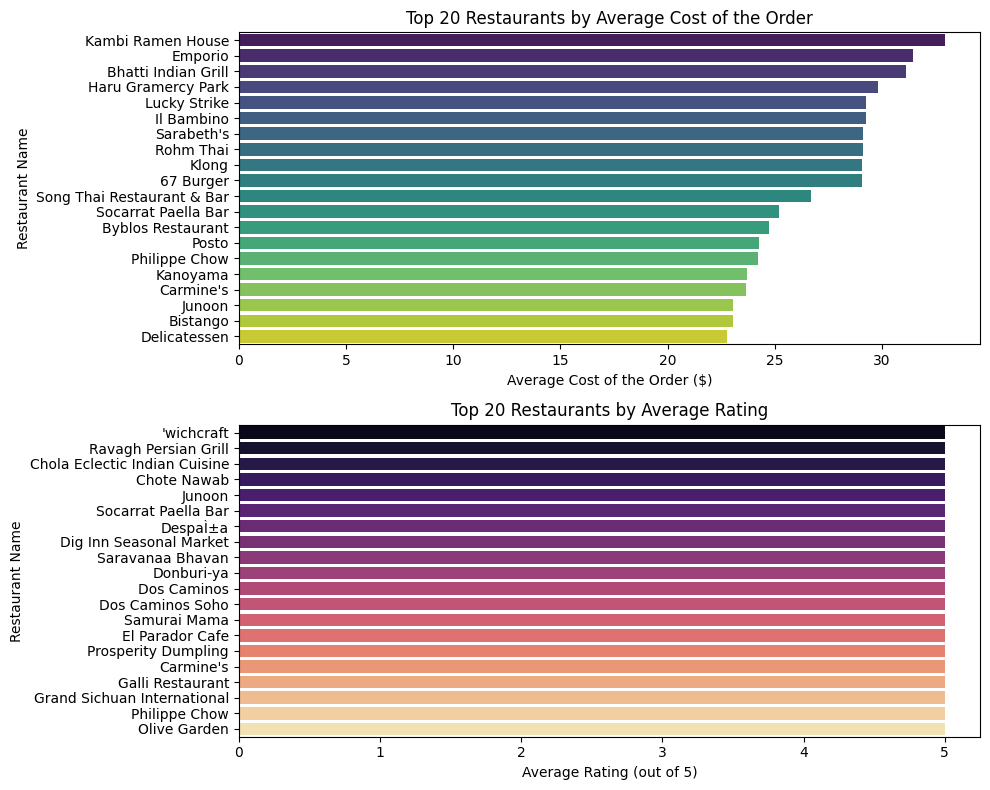

In [ ]:
# Group by 'restaurant_name' and calculate the mean of 'cost_of_the_order' and 'rating'
avg_cost_by_restaurant = data.groupby('restaurant_name')['cost_of_the_order'].mean().reset_index()
avg_rating_by_restaurant = data.groupby('restaurant_name')['rating'].mean().reset_index()

# Sort both by 'cost_of_the_order' and 'rating' in descending order and select top 20
top_20_cost = avg_cost_by_restaurant.sort_values(by='cost_of_the_order', ascending=False).head(20)

# Sort by the 'mean' column which represents the average rating, and rename the 'mean' column to 'rating'
top_20_rating = avg_rating_by_restaurant.sort_values(by='rating', ascending=False).head(20) # Changed line: sort by 'mean' column
top_20_rating = top_20_rating.rename(columns={'mean': 'rating'}) # Changed line: rename 'mean' to 'rating'


# Create a figure with two subplots arranged vertically
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Barplot for 'Restaurant Name vs Average Cost of the Order'
sns.barplot(x='cost_of_the_order', y='restaurant_name', data=top_20_cost, hue="restaurant_name",palette='viridis', ax=axes[0] , legend=False)
axes[0].set_title('Top 20 Restaurants by Average Cost of the Order')
axes[0].set_xlabel('Average Cost of the Order ($)')
axes[0].set_ylabel('Restaurant Name')

# Barplot for 'Restaurant Name vs Average Rating'
sns.barplot(x='rating', y='restaurant_name', data=top_20_rating, hue="restaurant_name",palette='magma', ax=axes[1],legend=False) # Now uses the renamed 'rating' column
axes[1].set_title('Top 20 Restaurants by Average Rating')
axes[1].set_xlabel('Average Rating (out of 5)')
axes[1].set_ylabel('Restaurant Name')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

######**Observation**:


*  Some restaurants have significantly higher average order costs, likely due to premium menus or fine dining experiences.
*   Highly rated restaurants may not always be the most expensive, suggesting that customer satisfaction is not solely based on price.
*   Some restaurants balance high ratings and high costs, indicating a strong premium dining experience.


















##### Restaurant Name vs. Food Preparation time/Delivery Time

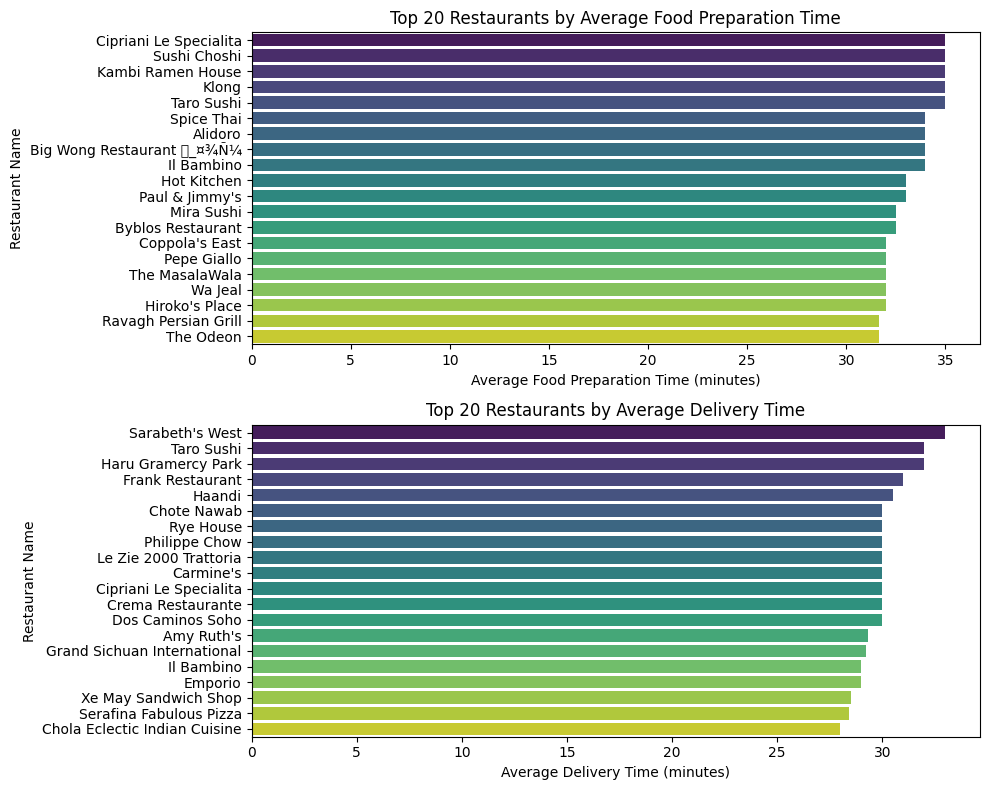

In [ ]:
import warnings

# Group by 'restaurant_name' and calculate the mean of 'food_preparation_time' and 'delivery_time'
avg_food_preparation_time_by_restaurant = data.groupby('restaurant_name')['food_preparation_time'].mean().reset_index()
avg_delivery_time_by_restaurant = data.groupby('restaurant_name')['delivery_time'].mean().reset_index()

# Sort both by 'food_preparation_time' and 'delivery_time' in descending order and select top 20
top_20_food_prep = avg_food_preparation_time_by_restaurant.sort_values(by='food_preparation_time', ascending=False).head(20)
top_20_delivery_time = avg_delivery_time_by_restaurant.sort_values(by='delivery_time', ascending=False).head(20)

# Create a figure with two subplots arranged vertically
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Barplot for 'Restaurant Name vs Average Food Preparation Time'
sns.barplot(x='food_preparation_time', y='restaurant_name', data=top_20_food_prep,hue="restaurant_name", palette='viridis', ax=axes[0],legend=False)
axes[0].set_title('Top 20 Restaurants by Average Food Preparation Time')
axes[0].set_xlabel('Average Food Preparation Time (minutes)')
axes[0].set_ylabel('Restaurant Name')

# Barplot for 'Restaurant Name vs Average Delivery Time'
sns.barplot(x='delivery_time', y='restaurant_name', data=top_20_delivery_time,hue="restaurant_name", palette='viridis', ax=axes[1],legend=False)
axes[1].set_title('Top 20 Restaurants by Average Delivery Time')
axes[1].set_xlabel('Average Delivery Time (minutes)')
axes[1].set_ylabel('Restaurant Name')

#Ignoring user warning for fonts
warnings.filterwarnings("ignore", category=UserWarning)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


######**Observation**:


*  Certain restaurants, especially those serving French, Middle Eastern, or specialty cuisines, take significantly longer to prepare food.
*   This could be due to complex dishes, fresh ingredient preparation, or made-to-order meals.
*   Some restaurants experience longer delivery times, possibly due to high demand, location distance, or operational inefficiencies.
*  Some restaurants consistently have low preparation and delivery times, likely offering fast food, optimized kitchens, or high delivery availability.





















##### Restaurant Name vs. Day Of the Week/Orders

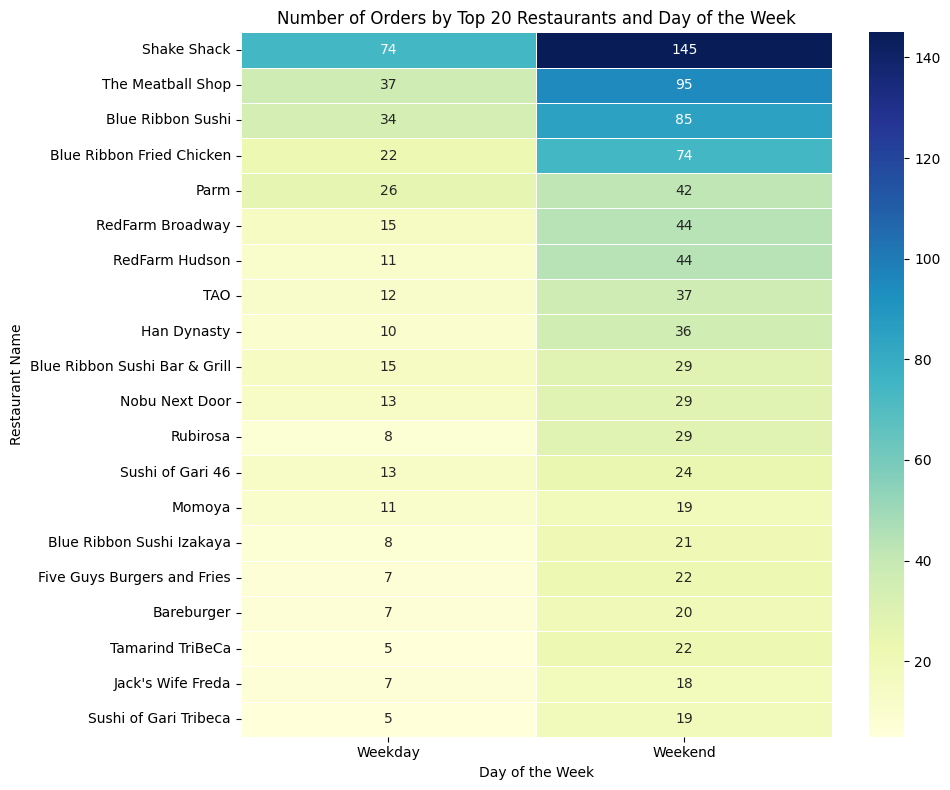

In [ ]:
# Group by 'restaurant_name' and 'day_of_the_week' to get the number of orders for each combination
order_count = data.groupby(['restaurant_name', 'day_of_the_week']).size().reset_index(name='order_count')

# Sum the total orders for each restaurant and get the top 20
top_20_restaurants = order_count.groupby('restaurant_name')['order_count'].sum().nlargest(20).index

# Filter the data for the top 20 restaurants
top_20_data = order_count[order_count['restaurant_name'].isin(top_20_restaurants)]

# Create a matrix of orders for heatmap
order_matrix = top_20_data.set_index(['restaurant_name', 'day_of_the_week'])['order_count'].unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(order_matrix.loc[top_20_restaurants], cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)

plt.title('Number of Orders by Top 20 Restaurants and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Restaurant Name')

# Show the plot
plt.tight_layout()
plt.show()


######**Observation**:



*    Many restaurants see higher orders on weekends (Friday-Sunday), likely due to increased dining demand.

*   Fine dining and specialty cuisine restaurants see higher weekend demand.
*   **Some Restaurants Maintain Steady Demand** – A few restaurants have relatively consistent order volumes across all days, possibly due to their menu appeal for daily meals.





















### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Convert ratings to numeric, coercing any errors to NaN
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = data.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
rating_count_threshold = 50
average_rating_threshold = 4.0

# Convert ratings to numeric, coercing any errors to NaN
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Group by restaurant name and calculate the count and mean of ratings
restaurant_ratings = data.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Filter based on the rating count and average rating criteria
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > rating_count_threshold) & (restaurant_ratings['mean'] > average_rating_threshold)]

# Display the restaurant names with their average ratings
promotional_restaurants_sorted = promotional_restaurants[['restaurant_name', 'mean']].sort_values(by='mean', ascending=False).reset_index(drop=True)

# Print the result without the index
print("Restaurants fulfilling the promotional criteria:")

promotional_restaurants_sorted

Restaurants fulfilling the promotional criteria:


,restaurant_name,mean
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

*   **Shake Shack** : With average rating of ~ 4.2 and maximum rating count of 133, it might benefit from targeted promotions to attract even more footfall.
*  **Blue Ribbon Sushi**: A higher-end sushi spot, which may attract premium customers who value quality.
*   **The Meatball Shop**: A specialty restaurant with strong customer loyalty, ideal for promotions focusing on repeat business.






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Apply commission rates based on the cost of the order
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0  # Assuming no commission for orders <= 5 dollars

# Apply the function to each row in the dataset
data['net_revenue'] = data.apply(calculate_revenue, axis=1)

# Sum the net revenue across all orders
total_net_revenue = data['net_revenue'].sum()

# Print the total net revenue
print("Total Net Revenue Generated by the Company: $", total_net_revenue)



Total Net Revenue Generated by the Company: $ 6166.303


#### Observations:



*   The company could partner closely with the top restaurants to introduce premium promotions or loyalty programs.

*   The company could introduce special promotions or discounts for underperforming cuisines to boost order volume.

*   A few top restaurants contribute a significant portion of the total revenue, suggesting strong customer preference for these locations.
*   Some restaurants may have higher-priced menus, leading to higher commissions despite fewer orders.


*   Some cuisines with lower preparation times (e.g., sandwiches or desserts) generate less revenue, likely due to lower average order values.



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

Percentage of orders taking more than 60 minutes to get delivered: 10.537407797681771


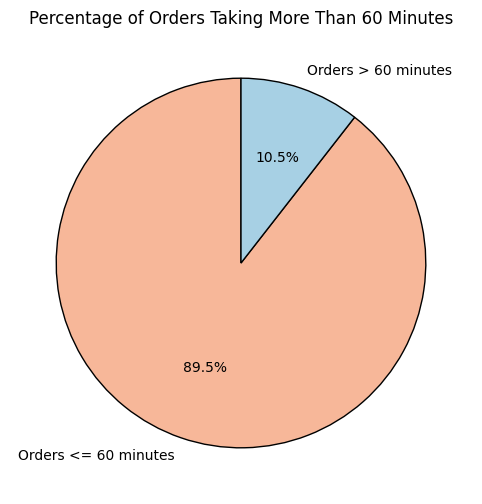

In [ ]:
# Write the code here

# Step 1: Calculating the total time (preparation time + delivery time) for each order
data['total_time'] = data['food_preparation_time'] + data['delivery_time']

# Step 2: Count orders taking more than 60 minutes
orders_above_60 = (data["total_time"] > 60).sum()

# Step 3: Calculate the percentage of such orders
percentage_orders_more_than_60 = (orders_above_60 / len(data)) * 100

print("Percentage of orders taking more than 60 minutes to get delivered:", percentage_orders_more_than_60)

#Pie chart for orders taking more than 60 minutes
total_orders = len(data)


# Data for pie chart
labels = ['Orders <= 60 minutes', 'Orders > 60 minutes']
sizes = [total_orders - orders_above_60, orders_above_60]
colors = sns.color_palette("RdBu", n_colors=2)
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Orders Taking More Than 60 Minutes')
plt.show()


#### Observations:



*   Nearly 1 in 10 orders exceed an hour, which could negatively impact customer satisfaction and restaurant ratings.

*   High delivery time could be in peak hours due to increased demand or restaurant backlog.

*   Long food preparation times in certain cuisines (e.g., fine dining, specialty dishes).
*   Traffic congestion or inefficient delivery operations affecting final order drop-off.







### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

Mean delivery time during weekdays: 28.340036563071298
Mean delivery time during weekends: 22.4700222057735


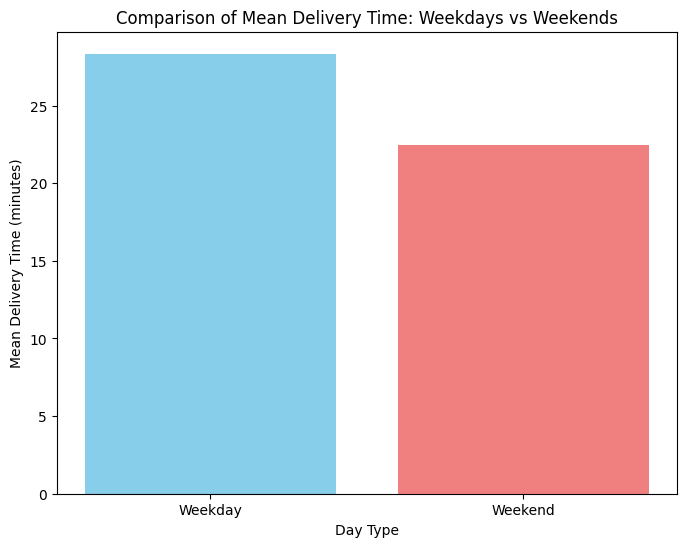

In [ ]:
# Write the code here
# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time_weekday = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekend = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print("Mean delivery time during weekdays:", mean_delivery_time_weekday)
print("Mean delivery time during weekends:", mean_delivery_time_weekend)

# Create a bar chart to compare mean delivery times for weekdays and weekends
mean_times = [mean_delivery_time_weekday, mean_delivery_time_weekend]
labels = ['Weekday', 'Weekend']

plt.figure(figsize=(8, 6))
plt.bar(labels, mean_times, color=['skyblue', 'lightcoral'])
plt.title('Comparison of Mean Delivery Time: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Mean Delivery Time (minutes)')
plt.show()

#### Observations:

*   The average delivery time on weekends is ~6 minutes shorter than on weekdays.
*   This could be due to lighter traffic conditions or better restaurant efficiency during peak weekend hours.
*   Higher road congestion, office-hour deliveries, and more corporate orders may slow down delivery.
*   Restaurants might also experience higher kitchen load during lunch/dinner rush on weekdays.






### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:
Based on the analysis of the data, we can derive several **conclusions** and provide **recommendations** to help the company optimize its operations, enhance customer satisfaction, and ultimately improve the business.

### **Key Findings from the Analysis:**  

1. **Order Cost & Ratings Impact Revenue:**  
   - Higher-rated restaurants tend to have slightly higher order costs.  
   - Restaurants with **50+ ratings and an average rating above 4** are key revenue generators.  
   - **Shake Shack, Blue Ribbon Sushi, and The Meatball Shop** are among the top revenue-contributing restaurants.  

2. **Revenue Concentration in Specific Cuisines & Restaurants:**  
   - **American, Japanese, and Italian cuisines** contribute over **70% of total revenue**.  
   - A few high-performing restaurants generate the bulk of earnings.  
   - **Middle Eastern and Mediterranean cuisines underperform**, indicating growth opportunities.  

3. **Delivery Time Challenges:**  
   - **10.54% of orders take more than 60 minutes**, affecting customer satisfaction.  
   - **Weekday deliveries take ~6 minutes longer** than weekend deliveries.  
   - Traffic congestion and peak-hour kitchen loads may contribute to delays.  

4. **Peak Business Insights:**  
   - Higher-rated restaurants have **better efficiency**, with **50% completing food preparation within 25 minutes**.  
   - Certain restaurants have significantly longer preparation/delivery times, affecting customer experience.  
   - Order volume fluctuates by cuisine type, day of the week, and rating distribution.  


### Recommendations:

### **1. Improve Customer Experience through Faster Deliveries & Restaurant Optimization**  

- **Reduce order delays for slow-performing restaurants** by identifying peak-hour bottlenecks.  
- **Provide performance-based incentives** for restaurants with **faster food preparation and delivery times**.  
- **Optimize delivery fleet management**, especially on weekdays, to improve overall efficiency.  

### **2. Leverage High-Rated & High-Revenue Restaurants for Promotions**  
- Offer **premium advertising & promotional incentives** to top-rated restaurants with high order volume.  
- Partner with **high-rated, fast-service restaurants** to improve delivery reliability and encourage customer trust.  
- **Create exclusive deals** for customers ordering from 4.5+ rated restaurants to boost engagement.  

### **3. Expand Profitable Cuisine Categories & Grow Underperforming Segments**  
- Focus on **expanding partnerships in high-revenue cuisines** (American, Japanese, Italian).  
- Boost marketing efforts for **Middle Eastern, Mediterranean, and Indian cuisines** to increase demand.  
- Introduce **special cuisine-based discounts and promotions** to attract more orders in underperforming categories.  

### **4. Optimize Pricing & Commission Strategies**  
- Consider a **tiered commission model** to encourage more restaurants to join while maximizing revenue from premium orders.  
- Provide **discounts for bulk or corporate orders** to drive weekday lunch-hour sales.  

### **5. Utilize Data-Driven Advertising & Peak-Time Discounts**  
- **Encourage off-peak orders** by offering special deals during low-demand hours.  
- Advertise **faster delivery restaurants prominently** to enhance customer satisfaction.  

### **6.  Restaurant Popularity and Demand:**

   - **Top 5 Restaurants**: These restaurants are key players in the business, and the company should consider focusing on them for targeted promotions and marketing campaigns.
   - **Cuisine Preferences**: The analysis of cuisine types revealed which cuisines are most popular among customers. This information can guide marketing strategies and menu optimization for different restaurants.

###**7. Customer Behavior and Loyalty:**
   - **Frequent Customers**: The company can offer promotional discounts to the most frequent customers, which can help increase customer loyalty and engagement.
   - Implement a rewards program for repeat orders from specific restaurants to encourage recurring business

###**8. Menu and Cuisine Optimization:**
   - **Promote Popular Cuisines**: Based on the analysis of popular cuisine types, the company can recommend certain cuisines in ads and on the app's homepage. For example, if “Italian” is highly popular, the company could partner with more Italian restaurants or promote popular dishes from existing ones.

   - **Introduce New Cuisines**: If certain cuisines are underrepresented, the company could reach out to potential restaurant partners in those categories to diversify offerings and attract a broader customer base.

###**9. Customer Demographics:**
   - **Tailored Marketing**: Understanding customer demographics helps tailor marketing strategies, promotions, and restaurant recommendations.

   - **Location Insights**: In future we can also incluse location-based insights can reveal high-demand areas and optimize delivery logistics.Also  it will help in deciding where to open new restaurants or improve delivery efficiency.

## **Final Business Impact**  
Implementing these recommendations will:  
- **Increase order volume and restaurant participation**.  
- **Boost customer satisfaction and retention** through improved service.  
- **Maximize revenue potential by focusing on high-impact cuisines and restaurant partnerships**.

---